# Data Ingestion:(10%)

In [1]:
import pandas as pd

In [3]:
df = pd.read_excel(r"C:\Users\alokg\Desktop\Machine Learing\ML_SaurabhSir\EndTermProject\Election_Data.xlsx", sheet_name="Election_Dataset_Two Classes")

In [10]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [13]:
# Checking for null values and handling them (dropping or imputing as needed).
# Performing data type validation and converting categorical or numeric data appropriately.

In [15]:
df.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

In [17]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [19]:
# Checking for null values
print(df.isnull().sum())

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


In [21]:
# Encoding 'vote' Using Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

# Encode 'vote' column
le = LabelEncoder()
df['vote'] = le.fit_transform(df['vote'])
df = pd.get_dummies(df, columns=['vote'], drop_first=True)

In [31]:
# checking all columns are numeric:
print(df.dtypes)

age                        int64
economic.cond.national     int64
economic.cond.household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political.knowledge        int64
gender                     int32
vote_1                      bool
dtype: object


In [29]:
# Since gender has only two categories (male and female), we can use Label Encoding to convert them into 0 and 1.
# Encoding 'gender' column
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [35]:
# Before computing furhter anything, checking if the DataFrame has all valid data:
print(df.shape)  # Should print (rows, columns)
print(df.head())  # Check the first few rows

(1525, 9)
   age  economic.cond.national  economic.cond.household  Blair  Hague  Europe  \
0   43                       3                        3      4      1       2   
1   36                       4                        4      4      4       5   
2   35                       4                        4      5      2       3   
3   24                       4                        2      2      1       4   
4   41                       2                        2      1      1       6   

   political.knowledge  gender  vote_1  
0                    2       0    True  
1                    2       1    True  
2                    2       1    True  
3                    0       0    True  
4                    2       1    True  


In [37]:
# force conversion in float datatype:
df = df.astype(float)  # Convert all columns to float

# 2. Exploratory Data Analysis (EDA)

In [41]:
# Performing Univariate & Bivariate Analysis

In [43]:
# Display basic info
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Display first few rows
df.head()

Shape of dataset: (1525, 9)

Data Types:
 age                        float64
economic.cond.national     float64
economic.cond.household    float64
Blair                      float64
Hague                      float64
Europe                     float64
political.knowledge        float64
gender                     float64
vote_1                     float64
dtype: object

Missing Values:
 age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
vote_1                     0
dtype: int64


,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote_1
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0.0,1.0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1.0,1.0
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1.0,1.0
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0.0,1.0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1.0,1.0


<Figure size 1200x600 with 0 Axes>

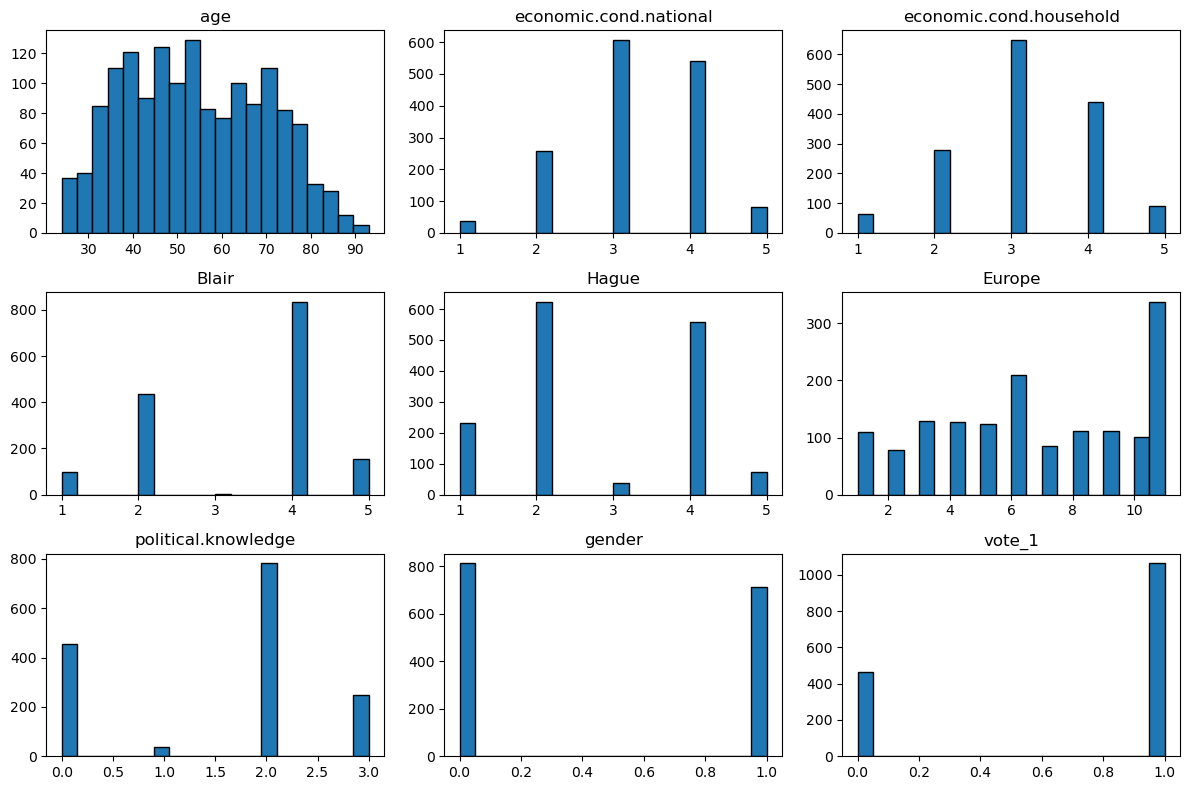

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Plot histograms for numerical columns
df.hist(figsize=(12, 8), bins=20, grid=False, edgecolor='black')

plt.tight_layout()
plt.show()

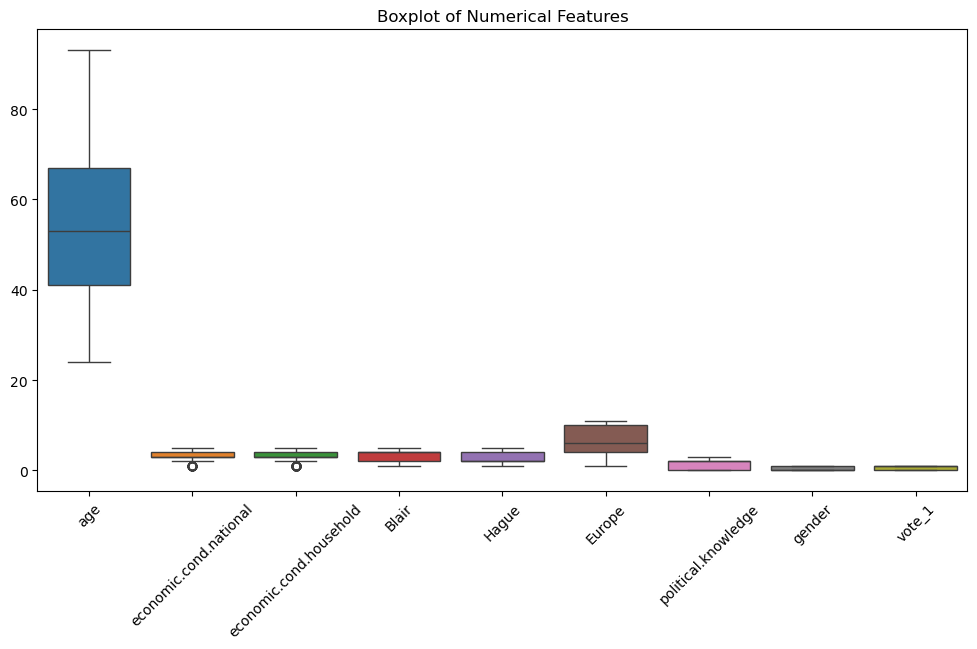

In [51]:
# Boxplots to Detect Outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

C:\Users\alokg\AppData\Local\Temp\ipykernel_11304\528731171.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['vote_1'], palette='coolwarm')
C:\Users\alokg\AppData\Local\Temp\ipykernel_11304\528731171.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'], palette='viridis')


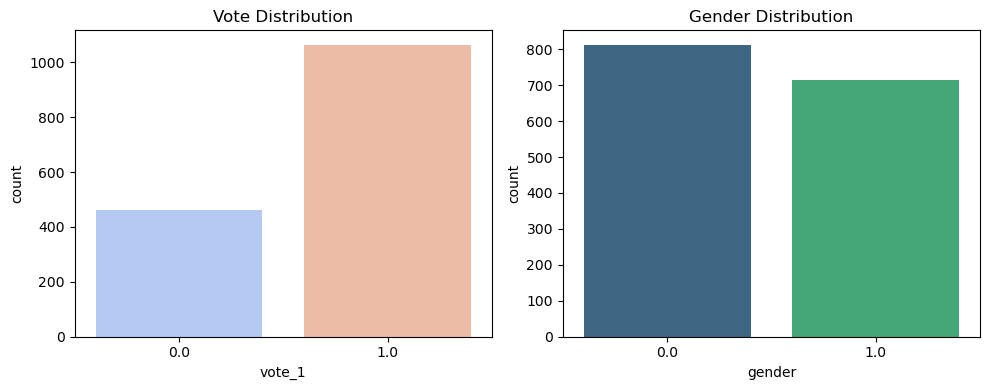

In [53]:
# Countplot for vote_1 and gender
plt.figure(figsize=(10, 4))

# Vote distribution
plt.subplot(1, 2, 1)
sns.countplot(x=df['vote_1'], palette='coolwarm')
plt.title('Vote Distribution')

# Gender distribution
plt.subplot(1, 2, 2)
sns.countplot(x=df['gender'], palette='viridis')
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

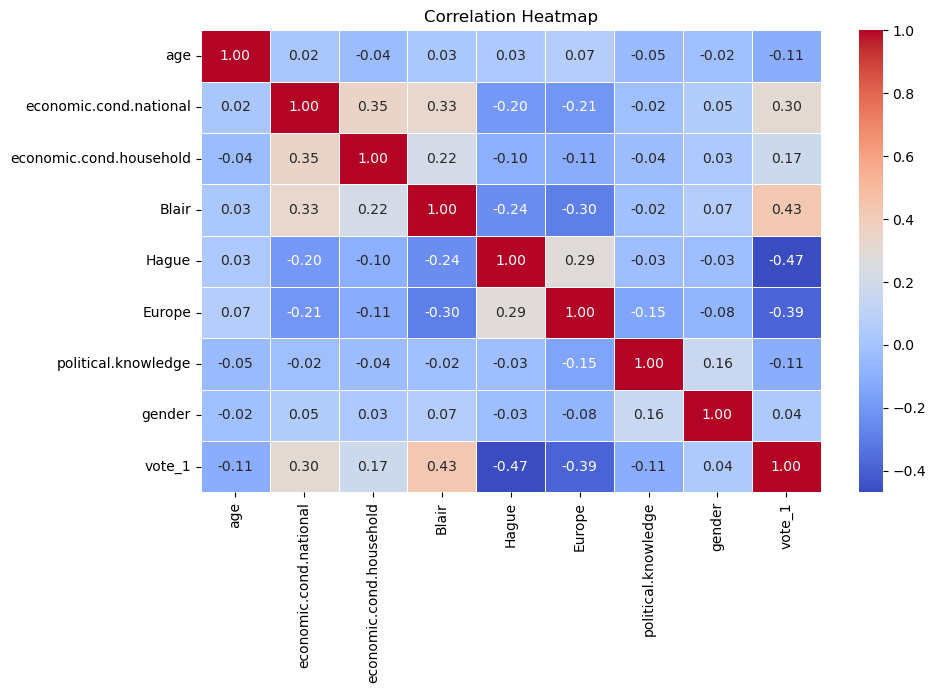

In [55]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1525 non-null   float64
 1   economic.cond.national   1525 non-null   float64
 2   economic.cond.household  1525 non-null   float64
 3   Blair                    1525 non-null   float64
 4   Hague                    1525 non-null   float64
 5   Europe                   1525 non-null   float64
 6   political.knowledge      1525 non-null   float64
 7   gender                   1525 non-null   float64
 8   vote_1                   1525 non-null   float64
dtypes: float64(9)
memory usage: 107.4 KB


In [67]:
# getting the target variable

In [59]:
df["vote_1"].value_counts()

vote_1
1.0    1063
0.0     462
Name: count, dtype: int64

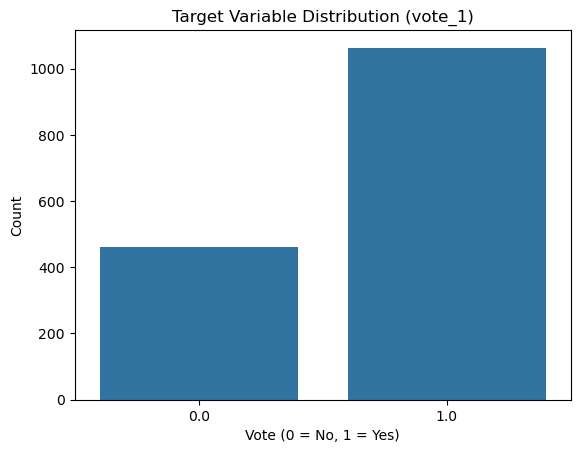

In [61]:
sns.countplot(x=df["vote_1"])
plt.title("Target Variable Distribution (vote_1)")
plt.xlabel("Vote (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

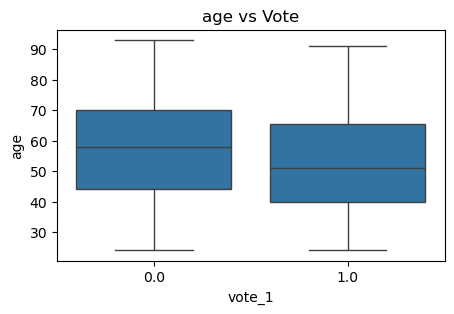

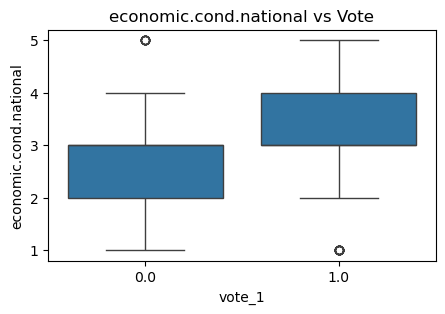

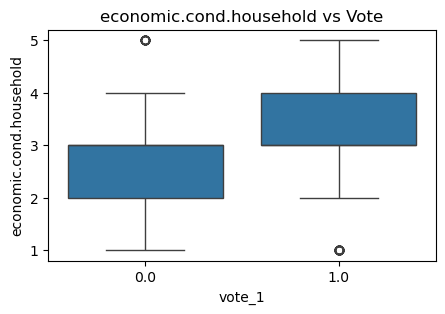

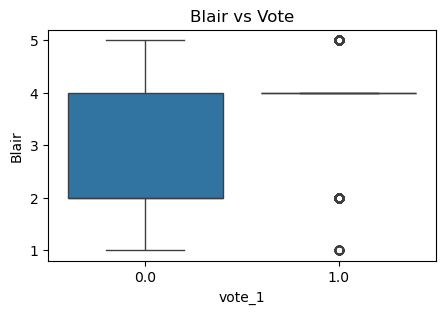

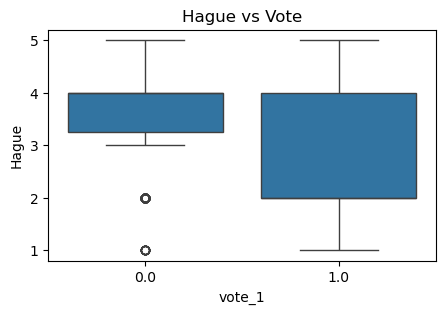

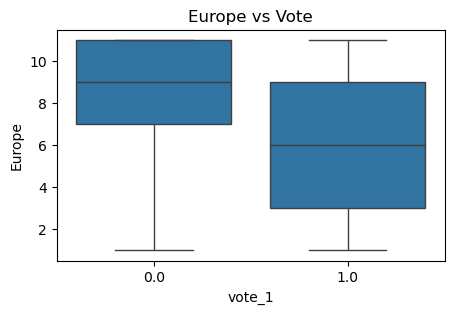

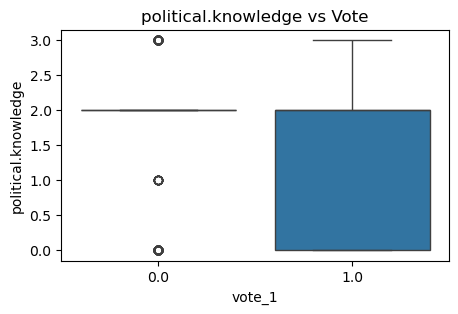

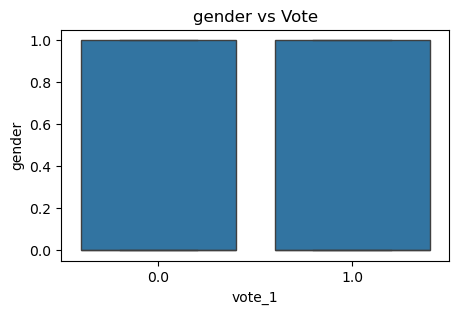

In [63]:
for col in df.columns[:-1]:  # Exclude vote_1
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df["vote_1"], y=df[col])
    plt.title(f"{col} vs Vote")
    plt.show()

In [65]:
df.corr()["vote_1"].sort_values(ascending=False)

vote_1                     1.000000
Blair                      0.427084
economic.cond.national     0.300737
economic.cond.household    0.174726
gender                     0.037191
political.knowledge       -0.108653
age                       -0.112821
Europe                    -0.385443
Hague                     -0.468508
Name: vote_1, dtype: float64

# Data Preparation

In [71]:
# Splitting Data into Train & Test

In [80]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["vote_1"])  # Features
y = df["vote_1"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [86]:
# Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Choosing Models

In [134]:
# importing all files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Logistics Regression

In [105]:
def evaluate_train_model(model, x_train, y_train):
    """ Evaluates model performance on the training set. """
    y_train_pred = model.predict(x_train)
    
    # Accuracy
    train_acc = model.score(x_train, y_train)
    print(f"Training Accuracy: {train_acc:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Train)')
    plt.show()

    # Classification Report
    print("Classification Report (Train):\n", classification_report(y_train, y_train_pred))

    # AUC-ROC Score
    train_probs = model.predict_proba(x_train)[:, 1]
    train_auc = roc_auc_score(y_train, train_probs)
    print(f"Train AUC-ROC Score: {train_auc:.4f}")
    
    return train_acc, train_auc

def evaluate_test_model(model, x_test, y_test):
    """ Evaluates model performance on the test set. """
    y_test_pred = model.predict(x_test)
    
    # Accuracy
    test_acc = model.score(x_test, y_test)
    print(f"Test Accuracy: {test_acc:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Test)')
    plt.show()

    # Classification Report
    print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))

    # AUC-ROC Score
    test_probs = model.predict_proba(x_test)[:, 1]
    test_auc = roc_auc_score(y_test, test_probs)
    print(f"Test AUC-ROC Score: {test_auc:.4f}")
    
    return test_acc, test_auc

In [112]:
# finding best estimator for the model
# Define the model
dt_model = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(5, 16),
    'min_samples_split': range(10, 30),
    'min_samples_leaf': range(10, 20),
    'max_features': [None, 'sqrt', 'log2']
}

# GridSearchCV for best model selection
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='recall',  # Optimize for recall
    n_jobs=-1,  # Use all processors
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best Model from GridSearch
best_grid = grid_search.best_estimator_

# Print Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 19800 candidates, totalling 99000 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 18, 'min_samples_split': 10}


Training Accuracy: 0.8361


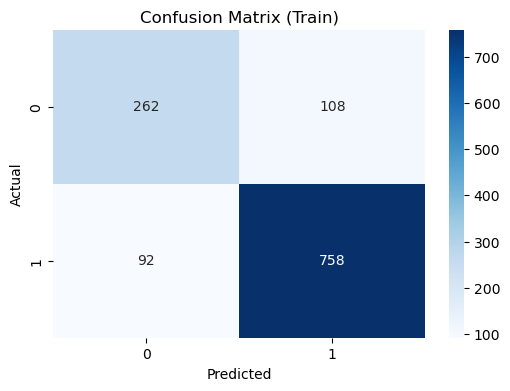

Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.74      0.71      0.72       370
         1.0       0.88      0.89      0.88       850

    accuracy                           0.84      1220
   macro avg       0.81      0.80      0.80      1220
weighted avg       0.83      0.84      0.84      1220

Train AUC-ROC Score: 0.9045


(0.8360655737704918, 0.9044864864864863)

In [124]:
evaluate_train_model(best_grid, X_train, y_train)

Test Accuracy: 0.8295


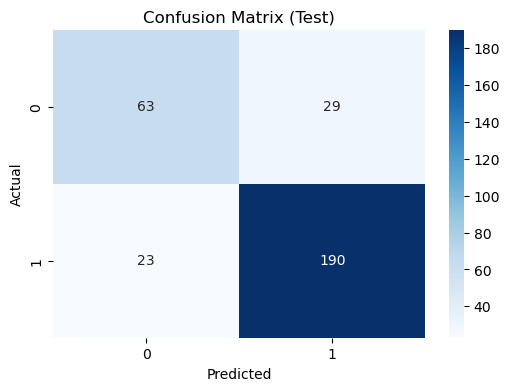

Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.73      0.68      0.71        92
         1.0       0.87      0.89      0.88       213

    accuracy                           0.83       305
   macro avg       0.80      0.79      0.79       305
weighted avg       0.83      0.83      0.83       305

Test AUC-ROC Score: 0.8695


(0.8295081967213115, 0.8694631557460708)

In [126]:
evaluate_test_model(best_grid, X_test, y_test)

In [131]:
from sklearn.metrics import classification_report
import pandas as pd

# Get classification reports as dict
train_report = classification_report(y_train, best_grid.predict(X_train), output_dict=True)
test_report = classification_report(y_test, best_grid.predict(X_test), output_dict=True)

# Convert to DataFrame
train_df = pd.DataFrame(train_report).T
test_df = pd.DataFrame(test_report).T

# Combine train & test results side by side
comparison_df = pd.concat([train_df, test_df], axis=1, keys=['Train', 'Test'])

# Display the comparison table
comparison_df

Train                                       Test            \
             precision    recall  f1-score      support precision    recall   
0.0           0.740113  0.708108  0.723757   370.000000  0.732558  0.684783   
1.0           0.875289  0.891765  0.883450   850.000000  0.867580  0.892019   
accuracy      0.836066  0.836066  0.836066     0.836066  0.829508  0.829508   
macro avg     0.807701  0.799936  0.803603  1220.000000  0.800069  0.788401   
weighted avg  0.834293  0.836066  0.835018  1220.000000  0.826852  0.829508   

                                    
              f1-score     support  
0.0           0.707865   92.000000  
1.0           0.879630  213.000000  
accuracy      0.829508    0.829508  
macro avg     0.793747  305.000000  
weighted avg  0.827819  305.000000

In [136]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

In [138]:
results = []

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Probabilities for AUC (except Decision Tree and KNN, which don't support `predict_proba` well)
    y_train_prob = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    metrics_dict = {
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Train Precision": precision_score(y_train, y_train_pred),
        "Test Precision": precision_score(y_test, y_test_pred),
        "Train Recall": recall_score(y_train, y_train_pred),
        "Test Recall": recall_score(y_test, y_test_pred),
        "Train F1-score": f1_score(y_train, y_train_pred),
        "Test F1-score": f1_score(y_test, y_test_pred),
        "Train AUC": roc_auc_score(y_train, y_train_prob) if y_train_prob is not None else None,
        "Test AUC": roc_auc_score(y_test, y_test_prob) if y_test_prob is not None else None
    }
    
    results.append(metrics_dict)

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results)

In [140]:
print(results_df.sort_values(by="Test Accuracy", ascending=False))

                 Model  Train Accuracy  Test Accuracy  Train Precision  \
3    Gradient Boosting        0.883607       0.849180         0.904110   
0  Logistic Regression        0.833607       0.845902         0.860647   
2        Random Forest        0.999180       0.842623         0.998825   
1        Decision Tree        0.999180       0.793443         1.000000   
5                  KNN        0.854918       0.783607         0.882821   
4                  SVM        0.780328       0.760656         0.772472   

   Test Precision  Train Recall  Test Recall  Train F1-score  Test F1-score  \
3        0.871111      0.931765     0.920188        0.917729       0.894977   
0        0.864035      0.908235     0.924883        0.883801       0.893424   
2        0.857143      1.000000     0.929577        0.999412       0.891892   
1        0.831858      0.998824     0.882629        0.999411       0.856492   
5        0.832579      0.912941     0.863850        0.897629       0.847926   
4      

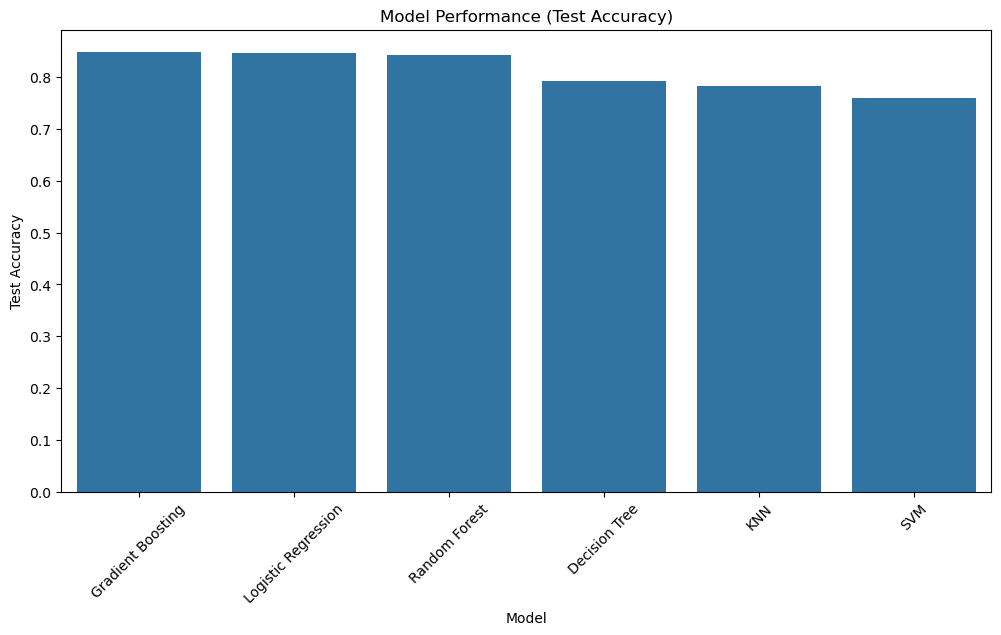

In [146]:
# Test accuracy comparision:
plt.figure(figsize=(12,6))
sns.barplot(x="Model", y="Test Accuracy", data=results_df.sort_values(by="Test Accuracy", ascending=False))
plt.xticks(rotation=45)
plt.title("Model Performance (Test Accuracy)")
plt.show()

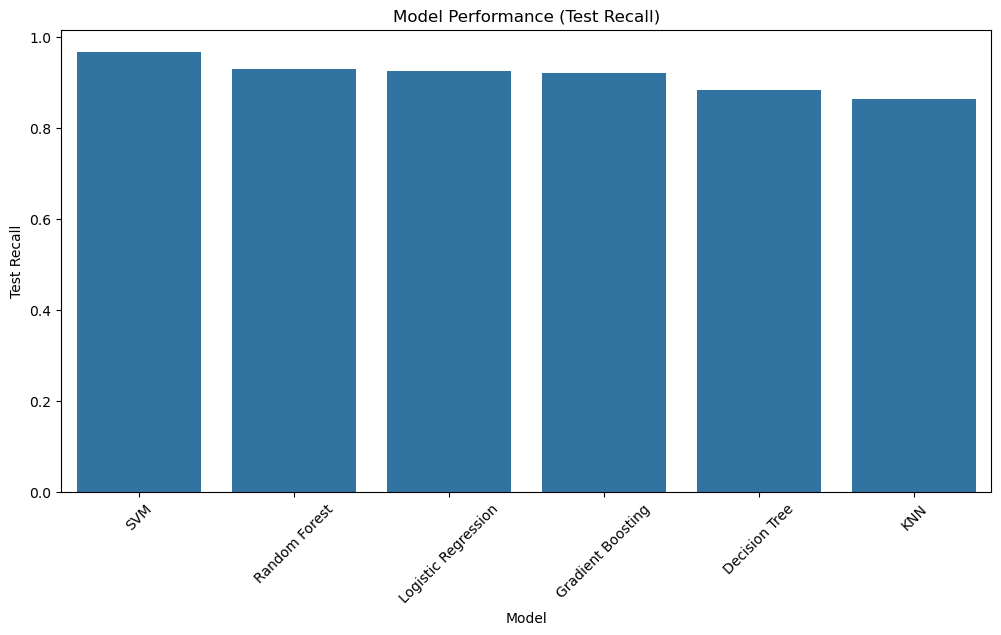

In [150]:
# Test Recall comparision:
plt.figure(figsize=(12,6))
sns.barplot(x="Model", y="Test Recall", data=results_df.sort_values(by="Test Recall", ascending=False))
plt.xticks(rotation=45)
plt.title("Model Performance (Test Recall)")
plt.show()

## Gradient Boosting performed the best, achieving the highest test accuracy (84.92%) and AUC (90.57%), meaning it generalizes well to unseen data.

In [155]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Defining the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],     # Step size shrinkage
    'max_depth': [3, 5, 7],                # Maximum tree depth
    'subsample': [0.7, 0.8, 1.0],          # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.8, 1.0]    # Fraction of features used per tree
}

# Initializing the GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy',  # Using the recall or f1-score if preferred
    n_jobs=-1, 
    verbose=2
)

# Fitting GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Getting the best model
best_xgb = grid_search.best_estimator_

# Printing the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Score: 0.8344262295081968


C:\Users\alokg\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:49:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [174]:
print("After comparing all models, the best hyperparameters obtained using GridSearchCV for XGBoost are: \n\n"
      "{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}. "
      "This model achieved the highest performance with a best score of 0.8344.")

After comparing all models, the best hyperparameters obtained using GridSearchCV for XGBoost are: 

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}. This model achieved the highest performance with a best score of 0.8344.


In [177]:
# ROC-AUC Curve:

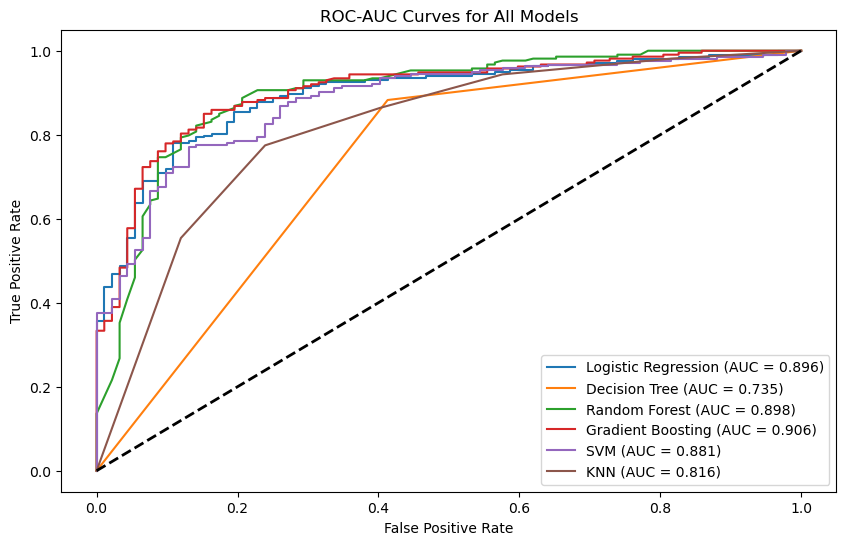

In [195]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for model_name, model in models.items():  # Replace with your actual models dictionary
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for All Models')
plt.legend()
plt.show()

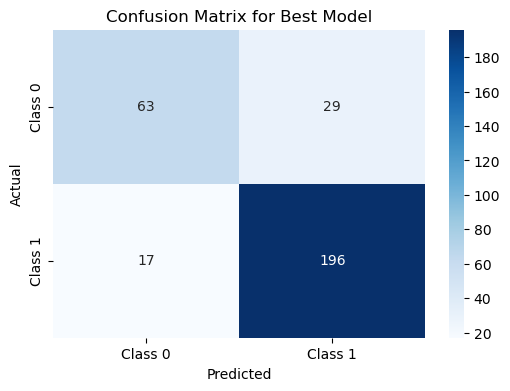

In [200]:
best_model = models['Gradient Boosting']  # Replace with your best model
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best Model')
plt.show()

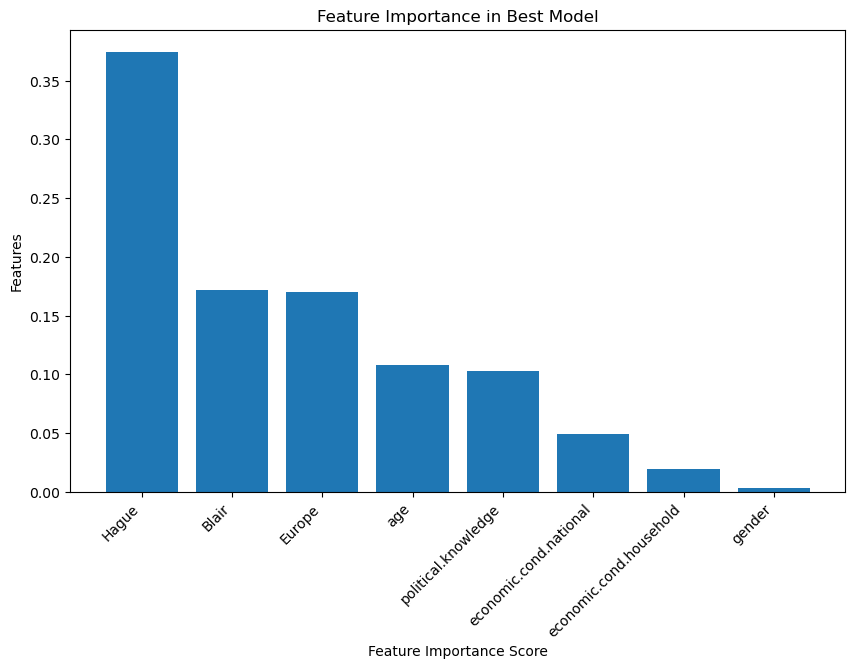

In [202]:
if hasattr(best_model, "feature_importances_"):  # Works for RandomForest, XGBoost, DecisionTree
    feature_importances = best_model.feature_importances_
    feature_names = X_train.columns  # Make sure your dataframe column names are used

    sorted_idx = np.argsort(feature_importances)[::-1]  # Sort in descending order
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
    plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx], rotation=45, ha="right")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title("Feature Importance in Best Model")
    plt.show()


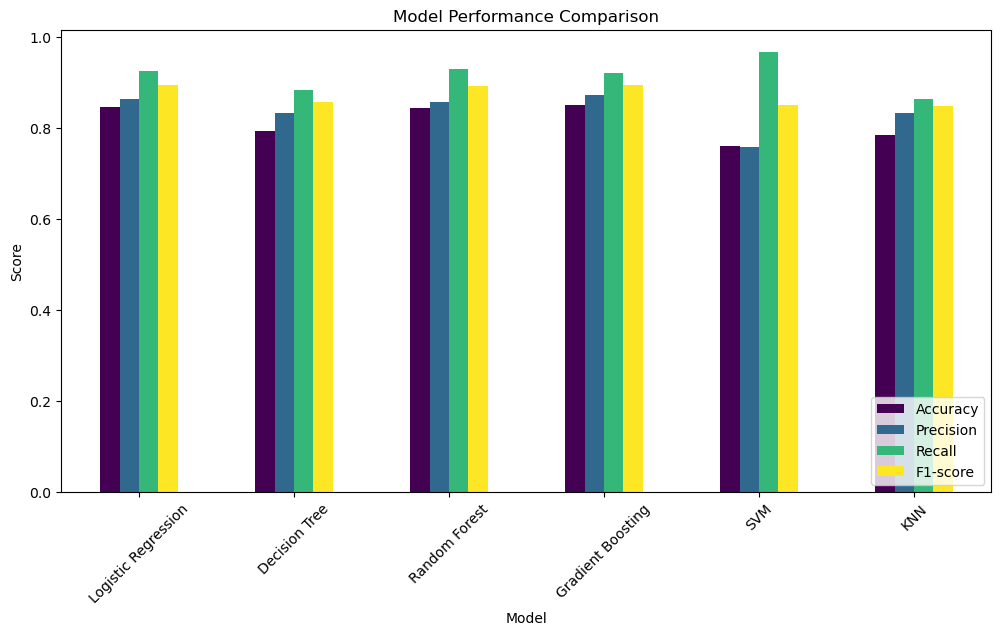

In [204]:
metrics_df = pd.DataFrame({
    "Model": results_df["Model"],
    "Accuracy": results_df["Test Accuracy"],
    "Precision": results_df["Test Precision"],
    "Recall": results_df["Test Recall"],
    "F1-score": results_df["Test F1-score"]
}).set_index("Model")

metrics_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()